Sklonujmy sobie najpierw repozytorium z danymi

In [1]:
!git clone https://github.com/matzim95/ML-datasets

fatal: destination path 'ML-datasets' already exists and is not an empty directory.


!ls ML-dataset

# Budowa modelu na danych rzeczywistych

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def load_dataset(filename, class_column, index_col=None):
    dataset = pd.read_csv(f'ML-datasets/{filename}.csv', index_col=index_col)
    dataset['class'] = dataset[class_column].astype('category').cat.codes
    classes = dataset.pop(class_column).unique()
    return dataset, classes

def prepare_dataset(dataset_name):
    params = {'iris': {'class_column': 'species', 'index_col': None},
              'wine': {'class_column': 'Class', 'index_col': None},
              'glass': {'class_column': 'Type', 'index_col': 'ID'},
              'diabetes': {'class_column': 'Class', 'index_col': None}}
    dataset, classes = load_dataset(dataset_name,
                                    **params[dataset_name])
    y = dataset.pop('class')
    X = dataset
    return X, y, classes

Skorzystamy ze zbioru diabets

In [3]:
X,y,classes = prepare_dataset('diabetes')

In [4]:
X.head()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [5]:
y.value_counts()

0    500
1    268
Name: class, dtype: int64

Podejrzyjmy co to za zbór

In [6]:
classes

array(['positive', 'negative'], dtype=object)

In [7]:
X.describe()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [8]:
X.isna().sum()

Number of times pregnant        0
Plasma glucose concentration    0
Diastolic blood pressure        0
Triceps skin fold thickness     0
2-Hour serum insulin            0
Body mass index                 0
Diabetes pedigree function      0
Age                             0
dtype: int64

Dzielimy dataset na zbiory treningowy i testowy

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y)

# stratify podbny udzial 0 i 1 w zbiorach testowych i treningowych

In [10]:
print(y_train.value_counts())
print(y_test.value_counts())

0    375
1    201
Name: class, dtype: int64
0    125
1     67
Name: class, dtype: int64


Trenujemy model na danych treningowych

In [11]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=30, max_iter=500)
model.fit(X_train, y_train)

LogisticRegression(max_iter=500, random_state=30)

In [12]:
X_test.head()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age
388,5,144,82,26,285,32.0,0.452,58
715,7,187,50,33,392,33.9,0.826,34
250,9,106,52,0,0,31.2,0.380,42
94,2,142,82,18,64,24.7,0.761,21
235,4,171,72,0,0,43.6,0.479,26


In [13]:
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

In [14]:
print(y_pred[:10])

[1 1 0 0 1 1 1 0 0 0]


Stwórzmy następnie macierz pomyłek i wyliczmy miary jakości klasyfikacji

In [15]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm_train = confusion_matrix(y_train, y_pred_train)

In [16]:
print(cm)

[[111  14]
 [ 22  45]]


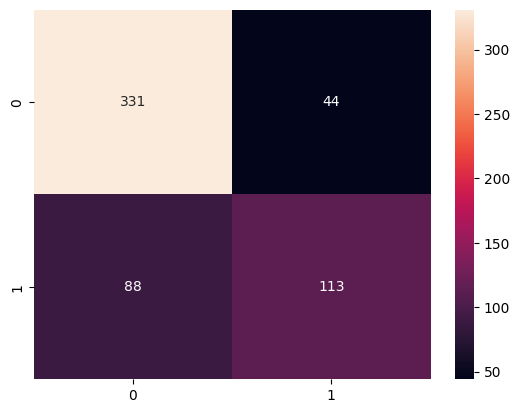

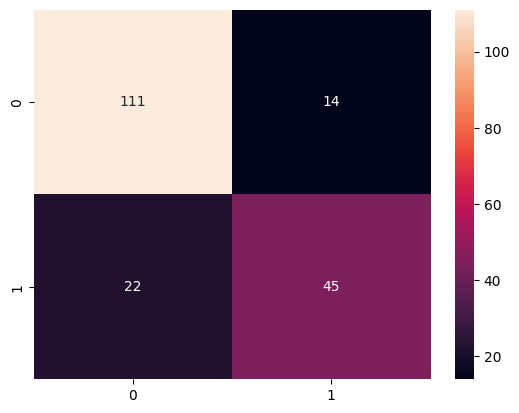

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(cm_train, annot = True, fmt = 'd')
plt.show()

sns.heatmap(cm, annot = True, fmt = 'd')
plt.show()

In [18]:
from sklearn.metrics import f1_score

print(f'F-score train: {f1_score(y_train,y_pred_train)}, F-score test: {f1_score(y_test,y_pred)}')

F-score train: 0.6312849162011174, F-score test: 0.7142857142857143


Możemy też obliczyć wartości pozostałych metryk klasyfikacji korzystając z wbudowanych funkcji.

Sprawdzenie czy model jest przetrenowany:

In [19]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred)

recall_train = recall_score(y_train, y_pred_train)
recall_test = recall_score(y_test, y_pred)

precision_train = precision_score(y_train, y_pred_train)
precision_test = precision_score(y_test, y_pred)

f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred)

In [20]:
df_dict = {'train':[accuracy_train, precision_train, recall_train, f1_train],
          'test':[accuracy_test, precision_test, recall_test, f1_test]}

In [21]:
df = pd.DataFrame\
.from_dict(df_dict, 
           orient = 'index',
           columns = ['accuracy', 'precision', 'recall', 'f-score'])\
.reset_index()\
.melt(id_vars = 'index', var_name = 'metric')

In [22]:
df

,index,metric,value
0,train,accuracy,0.770833
1,test,accuracy,0.812500
2,train,precision,0.719745
3,test,precision,0.762712
4,train,recall,0.562189
5,test,recall,0.671642
6,train,f-score,0.631285
7,test,f-score,0.714286


Możemy jeszcze spróbować wyświetlić to w formie wykresu.

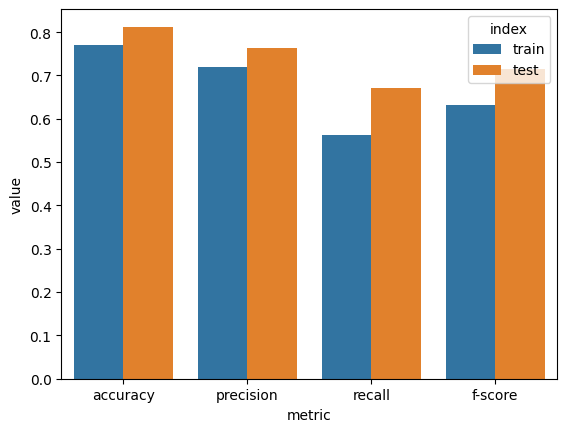

In [23]:
sns.barplot(x='metric', y='value', hue='index', data=df);

# Użycie średnika da sam wykres bez kawałków wyniku tekstowego wykonania kodu

Możemy też regresję logistyczną zastosować dla zbiorów o wielu etykietach. Stosujemy wówczas strategię One versus Rest (trenujemy tyle klasyfikatorów, ile mamy klas) - sklearn robi to automatycznie.

In [24]:
X, y, classes = prepare_dataset('iris')
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,test_size=0.3,random_state=30)

In [25]:
y.value_counts()

0    50
1    50
2    50
Name: class, dtype: int64

In [26]:
X.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [27]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [28]:
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

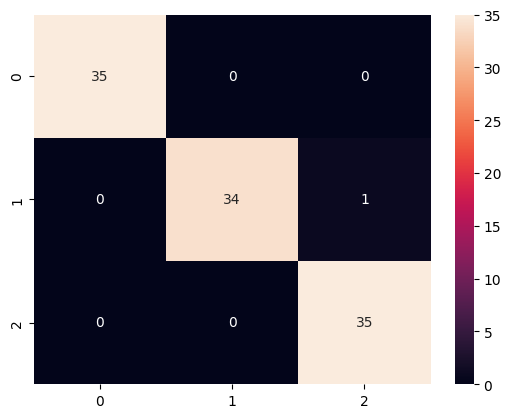

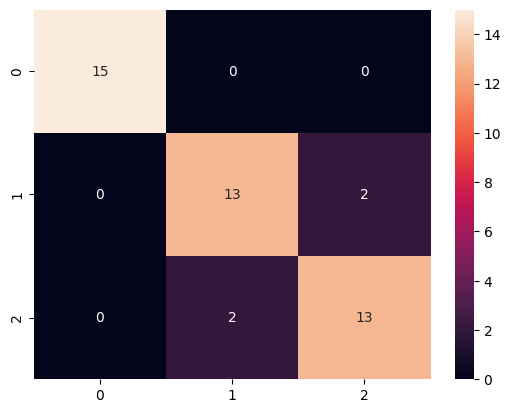

In [29]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm_train = confusion_matrix(y_train, y_pred_train)

import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(cm_train, annot = True, fmt = 'd')
plt.show()

sns.heatmap(cm, annot = True, fmt = 'd')
plt.show()

In [30]:
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred)

recall_train = recall_score(y_train, y_pred_train, average='macro')
recall_test = recall_score(y_test, y_pred, average='macro')

precision_train = precision_score(y_train, y_pred_train, average='macro')
precision_test = precision_score(y_test, y_pred, average='macro')

f1_train = f1_score(y_train, y_pred_train, average='macro')
f1_test = f1_score(y_test, y_pred, average='macro')

In [31]:
df_dict = {'train':[accuracy_train, precision_train, recall_train, f1_train],
          'test':[accuracy_test, precision_test, recall_test, f1_test]}

df = pd.DataFrame\
.from_dict(df_dict, 
           orient = 'index',
           columns = ['accuracy', 'precision', 'recall', 'f-score'])\
.reset_index()\
.melt(id_vars = 'index', var_name = 'metric')

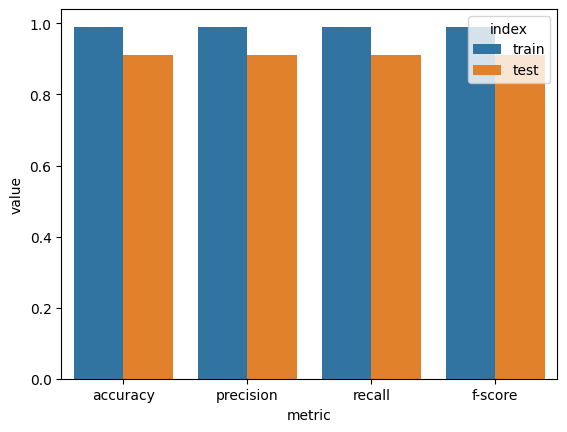

In [32]:
sns.barplot(x='metric', y='value', hue='index', data=df);

**Zadanie:**

Dla zbioru danych diabets wytrenuj model regresji logistycznej i narysuj krzywą ROC. Zwróć uwagę na różnice w funkcjach:
* predict()
* predict_proba()

Patrząc na krzywą ROC zastanów się czy model jest dobrze wytrenowany, przetrenowany czy wytrenowany niewystarczająco dobrze.

In [33]:
X,y,classes = prepare_dataset('diabetes')

In [34]:
X.head()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [35]:
y.value_counts()

0    500
1    268
Name: class, dtype: int64

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y)

# stratify podbny udzial 0 i 1 w zbiorach testowych i treningowych

print(y_train.value_counts())
print(y_test.value_counts())

0    375
1    201
Name: class, dtype: int64
0    125
1     67
Name: class, dtype: int64


In [37]:
model = LogisticRegression(random_state=30,max_iter=500)
model.fit(X_train,y_train)

LogisticRegression(max_iter=500, random_state=30)

In [38]:
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

y_pred_proba = model.predict_proba(X_test)
y_pred_train_proba = model.predict_proba(X_train) # proba - sotajemy prawdopodbienstwo

In [39]:
y_pred

array([1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0], dtype=int8)

In [40]:
y_pred_proba

array([[0.21415673, 0.78584327],
       [0.98691144, 0.01308856],
       [0.96099481, 0.03900519],
       [0.56380569, 0.43619431],
       [0.05812343, 0.94187657],
       [0.48536341, 0.51463659],
       [0.72983647, 0.27016353],
       [0.74793674, 0.25206326],
       [0.86518318, 0.13481682],
       [0.43293684, 0.56706316],
       [0.19855598, 0.80144402],
       [0.81233636, 0.18766364],
       [0.6760969 , 0.3239031 ],
       [0.84812566, 0.15187434],
       [0.60015767, 0.39984233],
       [0.69535578, 0.30464422],
       [0.95458953, 0.04541047],
       [0.02941845, 0.97058155],
       [0.25240397, 0.74759603],
       [0.95447917, 0.04552083],
       [0.4250259 , 0.5749741 ],
       [0.80102659, 0.19897341],
       [0.12647384, 0.87352616],
       [0.80159797, 0.19840203],
       [0.64342112, 0.35657888],
       [0.89267938, 0.10732062],
       [0.85095391, 0.14904609],
       [0.68502532, 0.31497468],
       [0.28512663, 0.71487337],
       [0.58467755, 0.41532245],
       [0.

In [41]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm_train = confusion_matrix(y_train, y_pred_train)

cm_proba = confusion_matrix(y_test, y_pred)
cm_train_proba = confusion_matrix(y_train, y_pred_train)

In [42]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay, roc_curve

fpr, tpr, treshold = roc_curve(y_test,y_pred_proba[:,1], drop_intermediate=False)
fpr_t, tpr_t, treshold_t = roc_curve(y_train,y_pred_train_proba[:,1], drop_intermediate=False)


In [43]:
def plot_roc(fpr_t,tpr_t,fpr,tpr):
    plt.figure(figsize=(10,6))
    plt.plot(fpr_t,tpr_t, c = 'red', label = 'train')
    plt.plot(fpr,tpr, c = 'blue', label = 'test')
    plt.axis([0,1,0,1])
    plt.plot([0,1], [0,1])
    plt.title('ROC')
    plt.legend()

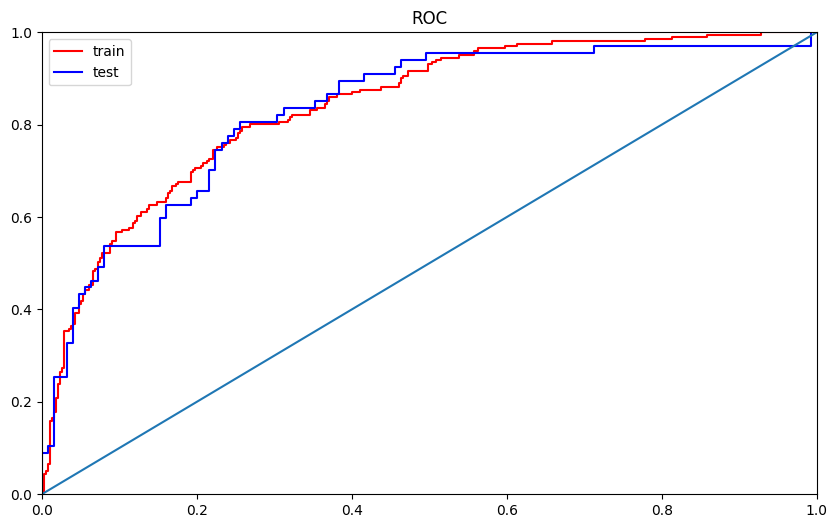

In [44]:
plot_roc(fpr_t, tpr_t, fpr, tpr)

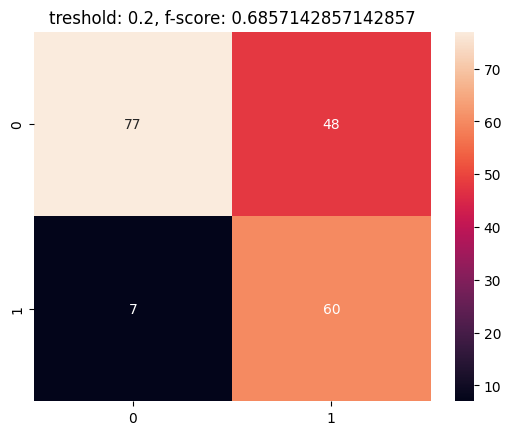

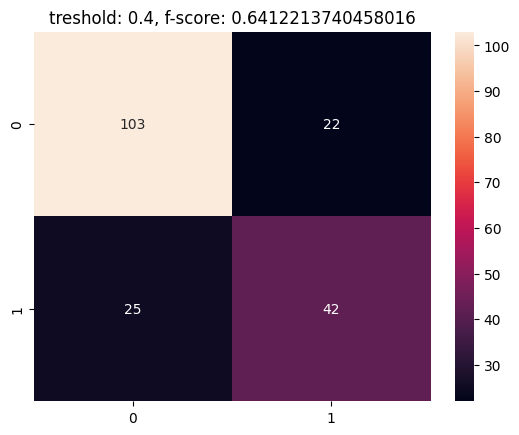

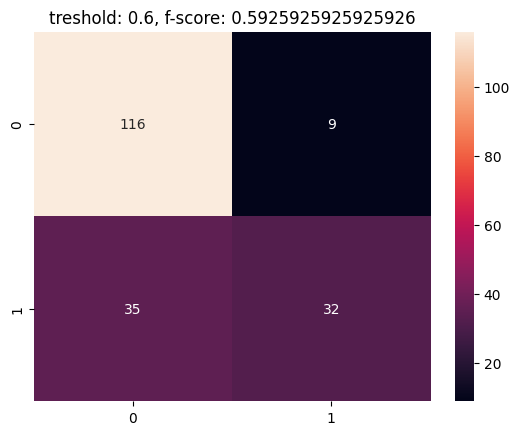

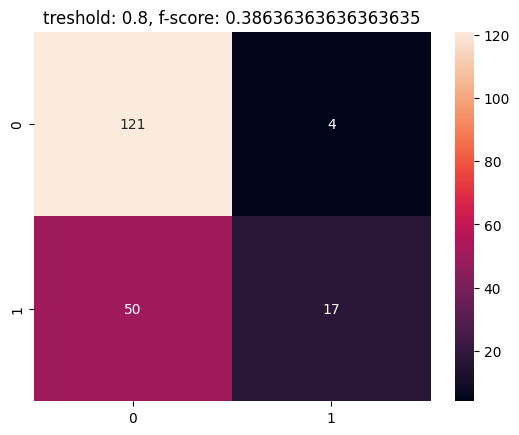

In [45]:
tresholds = [0.2, 0.4, 0.6, 0.8]

for treshold in tresholds:
    y_pred = []
    for y in y_pred_proba[:,1]:
        if y > treshold:
            y_pred.append(1)
        else:
            y_pred.append(0)
    cm = confusion_matrix(y_test, y_pred)
    f = f1_score(y_test, y_pred)
    sns.heatmap(cm, annot = True, fmt = 'd')
    title = f'treshold: {treshold}, f-score: {f}'
    plt.title(title)
    plt.show()
    
    

Korzystając z wbudwanej funkcji sklearn roc_auc_score importowanej podobnie jak accuracy_score, precision_score, recall_score, f1_score z modułu sklearn.metrics oblicz pole pod krzywą ROC:

In [46]:
from sklearn.metrics import roc_auc_score

auc_train = roc_auc_score(y_train, y_pred_train_proba[:, 1])
auc_test = roc_auc_score(y_test, y_pred_proba[:, 1])

print(f'Pole pod krzywą ROC dla zestawu treningowego: {round(auc_train,2)}')
print(f'Pole pod krzywą ROC dla zestawu testowwego: {round(auc_test,2)}')

Pole pod krzywą ROC dla zestawu treningowego: 0.84
Pole pod krzywą ROC dla zestawu testowwego: 0.83


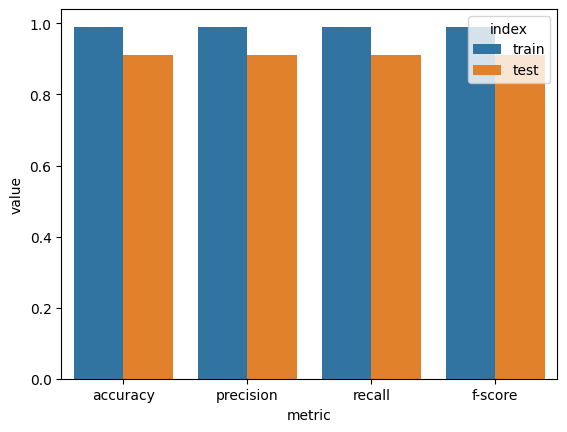

In [47]:
sns.barplot(x='metric', y='value', hue='index', data=df);

**Zadanie:** Przetestuj walidację krzyżową na analizowanym wcześniej zbiorze:

In [48]:
from sklearn.model_selection import cross_val_score

iteracja 1: trening: a,b,c,d, test: e <br>
iteracja 2: trening: a,b,c,e, test: d <br>
iteracja 3: trening: a,b,d,e, test: c <br>
iteracja 4: trening: a,c,d,e, test: b <br>
iteracja 5: trening: b,c,d,e, test: a <br>

In [49]:
from sklearn.model_selection import cross_val_score

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, random_state=30)

model = LogisticRegression(random_state = 30,max_iter=500)

scores = cross_val_score(model, X_train, y_train, cv=5, scoring = 'precision_macro')

TypeError: Singleton array 0.18075802887552717 cannot be considered a valid collection.

In [ ]:
scores

# Regularyzacja, czyli jak przeciwdziałać overfittingowi. Czy to jest w ogóle problem? Sprawdźmy!

In [51]:
wine, wine_classes = load_dataset('wine','Class')

In [52]:
wine.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


In [53]:
y = wine.pop('class')

In [54]:
X = wine

In [55]:
y.value_counts()

2    71
0    59
1    48
Name: class, dtype: int64

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=30,stratify=y,random_state=30)

In [57]:
model = LogisticRegression(random_state=30, max_iter=1500)
model.fit(X_train,y_train)

scores_precision = cross_val_score(model, X_train, y_train, cv=5, scoring="precision_macro")
scores_recall = cross_val_score(model, X_train, y_train, cv=5, scoring="recall_macro")

C:\Users\Kacper\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Kacper\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

In [58]:
print(scores_precision)
print(scores_recall)

[0.97435897 0.96296296 0.91538462 0.96296296 0.89469697]
[0.96666667 0.97222222 0.89722222 0.97222222 0.89772727]


In [59]:
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)

f_train = f1_score(y_train, y_pred_train, average='weighted')
f_test = f1_score(y_test, y_pred, average='weighted')

print(f'f-score na zbiorze treningowym: {f_train}')
print(f'f-score na zbiorze testowym: {f_test}')

f-score na zbiorze treningowym: 0.9932368043344393
f-score na zbiorze testowym: 1.0


Regularyzacja:

In [60]:
model = LogisticRegression(random_state=30, max_iter=1500, penalty='l2', C=0.1)
model.fit(X_train,y_train)

y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)

f_train = f1_score(y_train, y_pred_train, average='weighted')
f_test = f1_score(y_test, y_pred, average='weighted')

print(f'f-score na zbiorze treningowym: {f_train}')
print(f'f-score na zbiorze testowym: {f_test}')

f-score na zbiorze treningowym: 0.9730574324324324
f-score na zbiorze testowym: 0.9667356797791581


Przetestujmy teraz jednocześnie wiele wartości parametru regularyzacji

In [61]:
import numpy as np

C_values = [10.0**x for x in np.arange(-3,2,1)]

print(C_values)

[0.001, 0.01, 0.1, 1.0, 10.0]


In [62]:
train_err = []
valid_err = []

for C_value in C_values:
    model = LogisticRegression(random_state=30, max_iter=100, penalty='l2', C=C_value)
    model.fit(X_train,y_train)
    
    train_err.append(model.score(X_train,y_train))
    valid_err.append(model.score(X_test,y_test))

C:\Users\Kacper\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Kacper\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

In [63]:
train_err

[0.8108108108108109,
 0.9459459459459459,
 0.9594594594594594,
 0.972972972972973,
 0.9797297297297297]

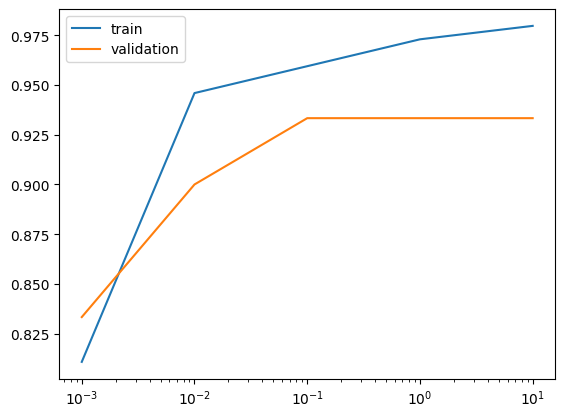

In [64]:
plt.semilogx(C_values, train_err, C_values, valid_err)
plt.legend(('train','validation'))
plt.show()

Skorzystajmy teraz z metody Grid Search. Regularyzacja l1 udostępnia selekcję cech, o możemy zobaczyć tu:

In [65]:
from sklearn.model_selection import GridSearchCV

In [66]:
lr = LogisticRegression(solver='liblinear',random_state=30)

params = {'C':[10.0**x for x in np.arange(-3,2,1)],
         'penalty':['l1','l2'],
         'max_iter':[100,300,500]}

In [67]:
searcher = GridSearchCV(lr, param_grid=params,cv=3,n_jobs=-1)
searcher.fit(X_train,y_train)

GridSearchCV(cv=3,
             estimator=LogisticRegression(random_state=30, solver='liblinear'),
             n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1.0, 10.0],
                         'max_iter': [100, 300, 500], 'penalty': ['l1', 'l2']})

In [68]:
best_lr = searcher.best_estimator_
best_lr
best_params = searcher.best_params_
best_params

{'C': 0.1, 'max_iter': 100, 'penalty': 'l2'}

In [69]:
coefs = best_lr.coef_

In [70]:
coefs

array([[-1.41163964e-01,  1.39206235e-01,  1.31606370e-01,
        -4.41857367e-01, -4.27735385e-02,  1.90438260e-01,
         4.47679216e-01, -2.96643449e-02,  1.04343639e-01,
        -1.08606529e-01, -1.23387479e-02,  2.98661852e-01,
         1.51025533e-02],
       [-1.52568737e-01,  3.74196921e-01,  1.46272864e-02,
         6.24525868e-02,  3.72547336e-03, -3.28771946e-01,
        -7.49339888e-01,  3.59379519e-05, -3.20350039e-01,
         7.42968877e-01, -1.69847206e-01, -5.40153209e-01,
        -2.24026805e-03],
       [ 2.73268530e-01, -4.87516258e-01, -1.31775982e-01,
         1.79426810e-01,  2.22246919e-02,  1.39446332e-01,
         2.44629328e-01,  5.66099083e-02,  1.33228642e-01,
        -9.40003948e-01,  2.04549988e-01,  2.65911888e-01,
        -9.00409188e-03]])

In [71]:
best_params

{'C': 0.1, 'max_iter': 100, 'penalty': 'l2'}

best_lr= model = LogisticRegression('C'= 0.1, 'max_iter'= 100, 'penalty' = 'l2', solver='liblinear',random_state=30)

# Granice decyzyjne na sztucznie wygenerowanym zbiorze:

Zaczniemy od wygenerowania sztucznego zbioru do klasyfikacji, składającego się z dwóch zbiorów punktów z rozkładu normalnego.

In [72]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# losowe dane dla dwóch klas, przy przesunięciu środka rozkładu
train_data = np.vstack((np.random.normal(size=(100, 2)),
                        np.random.normal(size=(100, 2), loc=2)))
train_labels = np.hstack((np.zeros(100), np.ones(100)))


# np.vstack - połaczenie tablic wertykalne
# np.hstack - połączenie tablic horyzontalne

In [73]:
train_data[:10]

array([[ 0.68865752, -1.24361277],
       [-0.18128992, -3.02130681],
       [-0.92798892, -0.90603665],
       [-0.24625226,  0.07256732],
       [-0.30285748, -0.81255623],
       [ 0.20449752, -1.29511171],
       [ 0.65043263, -1.75261172],
       [-1.35677977, -0.6785019 ],
       [ 1.68062366,  2.07055274],
       [-1.06616474, -0.77272548]])

In [74]:
train_labels[:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

Wyświetlimy je w postaci wykresu punktowego, wraz z linią dokładnie pomiędzy środkami obu rozkładów:

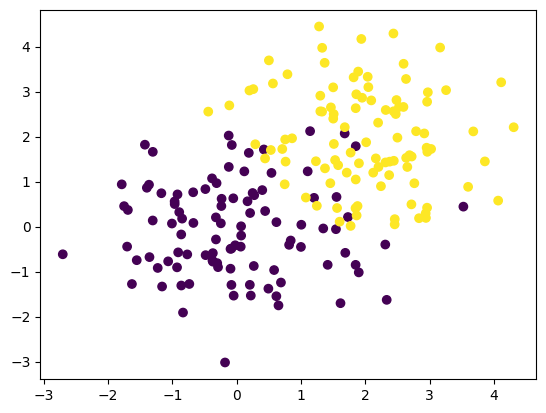

In [75]:
fig, ax = plt.subplots()

ax.scatter (train_data[:,0], train_data[:,1], c=train_labels)

Na tak utworzonym zbiorze wytrenujemy model regresji logistycznej

In [76]:
model = LogisticRegression()
model.fit(train_data, train_labels)

LogisticRegression()

Stwórzmy zbiór testowy poprzez rozszerzenie zakresu zbioru treningowego.

Funkcja ta zwraca meshgrid (czyli listę indeksów punktów z zadanego przedziału) na podstawie wygenerowanego zbioru danych.

In [77]:
x_min, x_max = train_data[:,0].min() -1, train_data[:,0].max() +1
y_min, y_max = train_data[:,1].min() -1, train_data[:,1].max() +1

xs, ys = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

In [78]:
print(xs.shape)
print(ys.shape)

(948, 902)
(948, 902)


In [79]:
y_pred = model.predict(np.column_stack((xs.flatten(),
                                       ys.flatten())))

In [80]:
print(y_pred.shape)

(855096,)


In [81]:
y_pred_matrix = y_pred.reshape(xs.shape)

In [83]:
for x,y, pred in zip(xs, ys, y_pred_matrix):
    print(x, y, pred)
    
    break

[-3.70575681e+00 -3.69575681e+00 -3.68575681e+00 -3.67575681e+00
 -3.66575681e+00 -3.65575681e+00 -3.64575681e+00 -3.63575681e+00
 -3.62575681e+00 -3.61575681e+00 -3.60575681e+00 -3.59575681e+00
 -3.58575681e+00 -3.57575681e+00 -3.56575681e+00 -3.55575681e+00
 -3.54575681e+00 -3.53575681e+00 -3.52575681e+00 -3.51575681e+00
 -3.50575681e+00 -3.49575681e+00 -3.48575681e+00 -3.47575681e+00
 -3.46575681e+00 -3.45575681e+00 -3.44575681e+00 -3.43575681e+00
 -3.42575681e+00 -3.41575681e+00 -3.40575681e+00 -3.39575681e+00
 -3.38575681e+00 -3.37575681e+00 -3.36575681e+00 -3.35575681e+00
 -3.34575681e+00 -3.33575681e+00 -3.32575681e+00 -3.31575681e+00
 -3.30575681e+00 -3.29575681e+00 -3.28575681e+00 -3.27575681e+00
 -3.26575681e+00 -3.25575681e+00 -3.24575681e+00 -3.23575681e+00
 -3.22575681e+00 -3.21575681e+00 -3.20575681e+00 -3.19575681e+00
 -3.18575681e+00 -3.17575681e+00 -3.16575681e+00 -3.15575681e+00
 -3.14575681e+00 -3.13575681e+00 -3.12575681e+00 -3.11575681e+00
 -3.10575681e+00 -3.09575

Dokonujemy predykcji oraz wyświetlamy wszystkie punkty pcolormeshem, żeby zobaczyć w jaki sposób regresja logistyczna dokonała podziału przestrzeni.

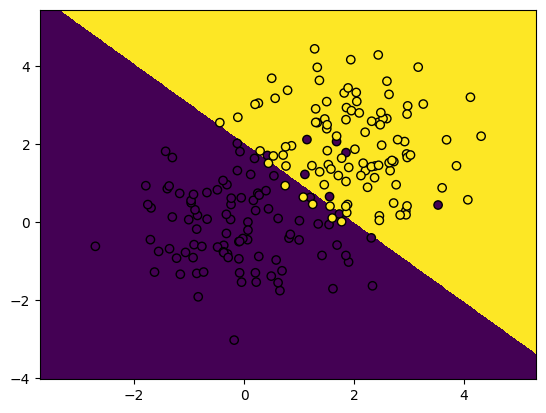

In [84]:
fig, ax = plt.subplots()
ax.pcolormesh(xs, ys, y_pred_matrix)
ax.scatter(train_data[:,0], train_data[:,1], c=train_labels, edgecolors = 'k')
plt.show()

Zwróćmy uwagę na fakt, że jest tutaj linia prosta.